In [1]:
import pandas as pd
import numpy as np
import gtda
from gtda.time_series import TakensEmbedding, SlidingWindow
from gtda.homology import VietorisRipsPersistence
import matplotlib.pyplot as plt
from gtda.diagrams import PersistenceEntropy,PersistenceLandscape,BettiCurve
from gudhi.wasserstein import wasserstein_distance
import gudhi
import ot
import multiprocessing
from functools import partial

In [2]:
def encontrar_minimo_global(distancias):
    minimo = min(distancias)
    indice_minimo = distancias.index(minimo)
    return minimo, indice_minimo

def wasserstein_distance1(diag1, diag2):
    """
    Calcula la distancia de Wasserstein entre dos diagramas de persistencia.
    Parámetros:
    diag1, diag2: numpy arrays de dimension (n, 2) donde n es el número de puntos en los diagramas.
                  Cada fila representa un punto en el diagrama de persistencia con la primera columna
                  representando la coordenada de nacimiento y la segunda columna la coordenada de muerte.
    Retorna:
    La distancia de Wasserstein entre los dos diagramas de persistencia.
    """
    # Crear el objeto Gudhi para calcular la distancia de Wasserstein.
    # Calcular la distancia de Wasserstein.
    dist = gudhi.wasserstein.wasserstein_distance(diag1, diag2)
    return dist
#Funcion para guardar la distancia de wassertein

def calcular_distancia_wasserstein(a, c, d, diagrams, i):
    return wasserstein_distance1(diagrams[a], diagrams[i])

def Guarda_distancias(a, c, d):
    """
    Guarda las distancias de wassertein en una lista 
    recibe a que es la coleccion 1 
    Parametros: (a,b) -> rango del conjunto [1] , (c,d)-> rango del conjunto [2] 
  
    Retorna:
    Una lista con las distancias de wassertein 
    """
    distancias = []
    # Crear un grupo de procesos
    pool = multiprocessing.Pool()
    # Crear una función parcial con los parámetros a, c y d fijados
    calcular_distancia_partial = partial(calcular_distancia_wasserstein, a, c, d, diagrams)
    # Calcular las distancias de forma paralela
    distancias = pool.map(calcular_distancia_partial, range(c, d))
    # Cerrar el grupo de procesos
    pool.close()
    # Esperar a que todos los procesos terminen
    pool.join()
    return distancias

def Generador_de_graficas(lista_de_distancias, nombre_imagen):
    # Plot the distances
    plt.plot(lista_de_distancias)
    plt.xlabel('Indice de distancias')
    plt.ylabel('Distancias de wassertein')
    plt.title('Distancias')
    plt.savefig(nombre_imagen, dpi=600)  # Save the graph with the provided name
    return plt.show()  # Display the graph


In [3]:
#Lectura de datos
df1 = pd.read_csv('BTCUSDT1m.csv')
df1.head()
df1['Close']
df1.describe
df1['Close timestamp']
close_ts = df1['Close'].to_numpy()
close_ts.shape
Time_ts = df1['Close time'].to_numpy()

In [4]:

#Analisis topologico
windows = SlidingWindow(size = 240,stride = 30)
sample =windows.fit_transform(close_ts)
sample.shape
#Encaje de takens
TE = TakensEmbedding(time_delay=1 ,dimension=3)
X_te = TE.fit_transform(sample)
X_te
#Vietoris Rips
VR = VietorisRipsPersistence(homology_dimensions=[0, 1,2],reduced_homology=False,n_jobs = -1)  # Parameter explained in the text
diagrams = VR.fit_transform(X_te)


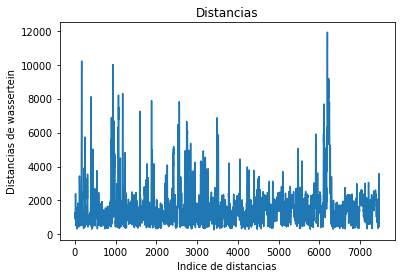

(266.9949618577957, 3414)

In [5]:
#Guardamos las graficas 
lista_de_distancias = Guarda_distancias(4,50,7526)
Generador_de_graficas(lista_de_distancias,'grafica_4-50-7526.png')
encontrar_minimo_global(lista_de_distancias)

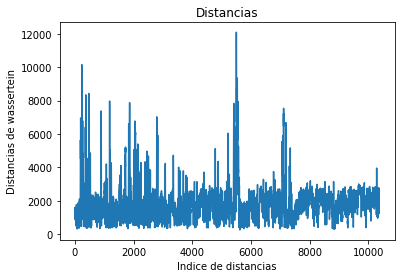

(250.4993348121643, 5619)

In [6]:
#Guardamos las graficas 
lista_de_distancias = Guarda_distancias(1,750,11122)
Generador_de_graficas(lista_de_distancias,'prueba.png')
encontrar_minimo_global(lista_de_distancias)

In [10]:
#graficar 2 ventanas 
#Funcion para encontrar las 100 ventanas de menor distancia hacia la ventana 1 
import heapq

def encontrar_ventanas

#plt.plot(lista_de_distancias[5619])

In [7]:
diagrams.shape

(13961, 354, 3)

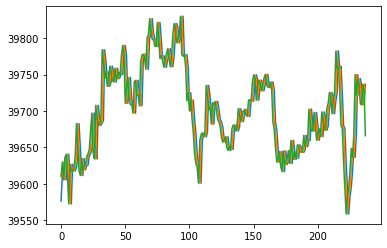

In [13]:
plt.plot(X_te[5619])

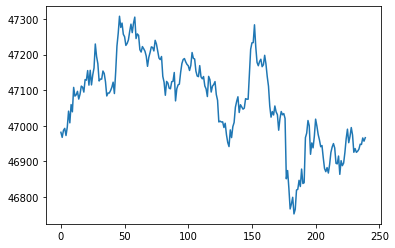

In [17]:
plt.plot(sample[1])

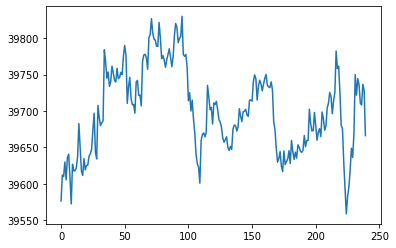

In [16]:
plt.plot(sample[5619])


In [18]:
df1

,Open time,Open,High,Low,Close,Volume,Close time,Quote volume,Trades,Taker buy base volume,Taker buy quote volume,Ignore,Open timestamp,Close timestamp
0,2022-01-01 00:00:00,46979.61,47000.00,46966.14,47000.00,9.86668,2022-01-01 00:00:59,4.636220e+05,562,4.21544,1.980888e+05,0,1641020400000,1641020459999
1,2022-01-01 00:01:00,46999.99,47000.00,46930.03,46947.02,28.97427,2022-01-01 00:01:59,1.360385e+06,686,9.87646,4.636423e+05,0,1641020460000,1641020519999
2,2022-01-01 00:02:00,46947.03,46993.81,46943.45,46967.40,7.11201,2022-01-01 00:02:59,3.340448e+05,512,4.58293,2.152551e+05,0,1641020520000,1641020579999
3,2022-01-01 00:03:00,46967.39,47000.00,46961.18,46994.94,5.49552,2022-01-01 00:03:59,2.582315e+05,430,2.41143,1.133041e+05,0,1641020580000,1641020639999
4,2022-01-01 00:04:00,46994.94,47044.25,46972.60,47044.24,10.09558,2022-01-01 00:04:59,4.744919e+05,543,7.45859,3.505575e+05,0,1641020640000,1641020699999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
419036,2022-10-18 23:56:00,19199.90,19203.33,19192.28,19196.83,165.77889,2022-10-18 23:56:59,3.182567e+06,3335,84.53628,1.622958e+06,0,1666162560000,1666162619999
419037,2022-10-18 23:57:00,19197.82,19199.81,19188.26,19191.88,149.50924,2022-10-18 23:57:59,2.869534e+06,2989,68.10353,1.307131e+06,0,1666162620000,1666162679999
419038,2022-10-18 23:58:00,19193.39,19198.65,19187.34,19189.97,134.82045,2022-10-18 23:58:59,2.587511e+06,3018,73.66635,1.413874e+06,0,1666162680000,1666162739999
419039,2022-10-18 23:59:00,19189.32,19197.03,19187.34,19190.20,122.38541,2022-10-18 23:59:59,2.348842e+06,2885,50.00596,9.597709e+05,0,1666162740000,1666162799999
